<a href="https://colab.research.google.com/github/dubrovskaya/DataStorytelling/blob/master/Human_Freedom_Index_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Human Freedom index analysis

###Human Freedom Index is an annual rating, conducted by the Cato institute to present the state of human freedom in the world based on a broad measure that encompasses personal, civil, and economic freedom.

This analysis looks at the rating from 2008 (first year that it was conducted), to 2017 to understand what's happening to people's freedoms around the world in the last decade.

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import chart_studio.plotly as py
import plotly.express as px
import numpy as np
from plotly.subplots import make_subplots
import plotly.graph_objects as go


In [0]:
import chart_studio

chart_studio.tools.set_credentials_file(username='dubrvoskaya', api_key='ZEXrfDiIA14kkMEzVmj4')

#Import data from Github

###HFI data

In [0]:
url='https://raw.githubusercontent.com/dubrovskaya/DataStorytelling/master/human-freedom-index-2019.csv'
data=pd.read_csv(url, na_values='-')
data=data.dropna(axis=1, how='all')

In [0]:
data.head()

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38.0,1.0,6.7,4.5,4.7,5.3,9.1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,7.5,8.8,9.3,10.0,10.0,10.0,10.0,NaN,NaN,10.0,9.6,8.0,9.2,10.0,10.0,NaN,NaN,10.0,NaN,...,5.1,9.3,9.7,9.6,10.0,9.6,9.6,9.3,8.1,9.0,6.0,9.4,7.7,10.0,6.3,5.4,8.3,6.7,8.3,10.0,9.1,10.0,9.7,5.6,5.4,6.4,8.0,6.3,10.0,6.9,6.3,6.7,9.7,4.1,6.0,7.2,6.7,7.8,7.67,30.0
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155.0,4.0,NaN,NaN,NaN,3.8,9.5,10.0,9.5,5.0,9.9,9.9,8.9,10.0,NaN,NaN,0.0,5.0,7.8,10.0,5.0,2.5,5.8,NaN,NaN,5.0,6.9,3.0,4.9,5.0,5.0,NaN,NaN,5.0,NaN,...,4.7,7.0,8.5,8.9,5.0,7.3,8.5,6.2,5.9,6.9,4.8,0.5,2.6,0.0,3.7,0.0,1.1,1.6,2.8,0.0,5.3,10.0,5.1,5.6,4.1,6.0,6.0,7.8,3.0,5.4,3.7,1.8,9.3,3.8,8.7,7.0,5.7,5.4,4.77,159.0
2,2017,AGO,Angola,Sub-Saharan Africa,5.40,151.0,4.0,NaN,NaN,NaN,3.4,8.1,10.0,9.7,7.5,9.9,7.2,8.9,10.0,NaN,NaN,5.0,7.5,8.1,5.0,5.0,10.0,6.7,NaN,NaN,10.0,8.9,7.5,8.8,2.5,2.5,NaN,NaN,2.5,NaN,...,3.0,9.4,4.2,3.7,5.0,5.6,9.2,7.7,4.3,7.1,4.9,2.5,3.7,0.0,2.9,3.1,0.1,2.0,3.2,5.0,9.2,6.0,6.7,10.0,4.4,7.2,4.0,6.6,0.0,5.4,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158.0
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77.0,2.0,7.1,5.8,4.3,5.7,8.0,5.0,10.0,7.5,10.0,10.0,8.5,10.0,NaN,NaN,10.0,10.0,8.8,10.0,10.0,10.0,10.0,NaN,NaN,7.5,9.0,6.9,7.8,7.5,10.0,NaN,NaN,5.0,NaN,...,4.0,5.0,6.0,4.9,10.0,6.5,6.7,7.3,5.9,6.6,4.6,5.2,4.9,10.0,5.4,0.8,8.0,4.7,6.5,5.0,4.3,9.0,6.1,2.8,2.2,3.3,10.0,2.5,10.0,5.1,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54.0,2.0,NaN,NaN,NaN,4.9,9.0,10.0,10.0,7.5,10.0,10.0,9.5,10.0,NaN,NaN,7.5,8.8,9.1,10.0,5.0,10.0,8.3,NaN,NaN,5.0,8.6,5.1,6.2,7.5,7.5,NaN,NaN,5.0,NaN,...,5.9,8.6,9.5,9.8,10.0,9.5,9.0,8.8,8.1,8.6,5.7,9.0,7.4,10.0,5.1,5.4,10.0,6.8,8.2,10.0,7.8,10.0,9.3,6.7,5.7,6.8,10.0,9.3,0.0,6.4,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.70,27.0


In [0]:
data.shape

(1620, 120)

In [0]:
data.describe()

,year,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,pf_association_prof_operate,pf_association_prof,pf_association_sport_establish,...,ef_legal_gender,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
count,1620.000000,1540.000000,1540.000000,1540.00000,985.000000,985.000000,985.000000,1540.000000,1540.000000,1530.00000,1540.000000,1430.000000,1540.000000,1540.000000,1540.000000,1540.000000,917.000000,917.000000,1499.000000,1540.000000,1540.000000,1530.000000,1530.00000,1478.000000,1540.000000,727.000000,727.000000,1265.000000,1524.000000,1524.000000,1529.000000,1265.000000,1265.000000,727.000000,727.000000,1265.000000,727.000000,727.000000,1265.000000,727.000000,...,1596.000000,1540.000000,1596.000000,1565.000000,1569.000000,1540.000000,1540.000000,1447.000000,1526.000000,1527.000000,1534.000000,1447.000000,1528.000000,1536.000000,1533.000000,1446.000000,1530.000000,1534.000000,1540.000000,1539.000000,1472.000000,1568.000000,1518.000000,1540.000000,1529.000000,1434.000000,1435.000000,1532.000000,1539.000000,1536.000000,1436.000000,1518.000000,1530.000000,1435.000000,1516.000000,1530.000000,1536.000000,1540.000000,1540.000000,1540.000000
mean,2012.500000,6.978214,77.465584,2.48961,5.493198,5.482437,5.027005,5.282857,7.455065,8.46732,9.510519,6.757273,9.567013,9.597338,8.829416,9.296818,6.270447,6.259542,6.647765,8.026688,8.098961,7.689542,7.69281,8.037889,7.838701,7.524072,7.497799,7.442055,8.748950,7.224475,7.834794,7.794466,7.385375,7.496561,6.652407,6.886166,7.424347,6.962036,6.965455,8.332187,...,0.887469,5.274286,8.558709,8.292268,8.857616,6.688312,8.141961,8.257464,8.233984,5.942083,7.467334,5.715999,6.622795,6.132917,9.749250,5.923409,3.586340,5.435854,4.912403,7.057674,7.601223,7.849088,9.268116,8.253052,6.445670,4.733752,6.432892,7.952350,6.605588,6.446237,3.977716,5.282082,8.886275,4.838815,7.763015,7.016268,6.336497,7.007273,6.792981,77.420779
std,2.873168,1.056239,44.782074,1.11951,2.144246,1.424619,1.715538,1.539923,2.814348,3.07215,1.757348,2.771370,1.606566,1.449308,1.641217,1.934707,3.715442,3.755670,3.578233,2.303343,1.463495,3.548923,3.49302,3.111272,2.610054,2.731897,2.676594,2.675848,0.945247,1.745170,1.388097,2.751806,2.954478,3.073086,3.110502,3.129321,2.846713,2.815202,2.885442,2.241152,...,0.140597,1.575293,1.138450,1.859849,1.415785,4.107110,1.397049,2.037254,0.998668,2.060446,1.224162,1.118871,2.632313,1.728934,1.341167,1.320979,2.838975,3.460153,2.018722,1.129028,2.735187,2.508

In [0]:
data.describe(include=object)

,ISO_code,countries,region,ef_regulation_labor_dismissal
count,1620,1620,1620,1508
unique,162,162,10,81
top,KEN,Laos,Sub-Saharan Africa,10
freq,10,10,420,254


#Let's explore it 

###General graph of where the score moved in 10 years from 2008 to 2017

Overall globally

In [0]:
means = data.pivot_table(index='year',values=['hf_score', 'pf_score', 'ef_score'], aggfunc='mean')
means=means.reset_index().melt(id_vars='year')
means

,year,variable,value
0,2008,ef_score,6.762340
1,2009,ef_score,6.767872
2,2010,ef_score,6.772484
3,2011,ef_score,6.804641
4,2012,ef_score,6.793137
5,2013,ef_score,6.794395
6,2014,ef_score,6.823333
7,2015,ef_score,6.802453
8,2016,ef_score,6.803148
9,2017,ef_score,6.799074


In [0]:
#Making a plot

fig = go.Figure()

toplot=means[means['variable']=='hf_score']
fig.add_trace(go.Scatter(x=toplot['year'], y=toplot['value'], name = 'Human freedom score (overall)', line=dict(color='#F5AD07', width=4)))


toplot=means[means['variable']=='ef_score']
fig.add_trace(go.Scatter(x=toplot['year'], y=toplot['value'], name = 'Economic freedom score', line=dict(color='#999999', width=2)))

toplot=means[means['variable']=='pf_score']
fig.add_trace(go.Scatter(x=toplot['year'], y=toplot['value'], name = 'Personal freedom score', line=dict(color='#D3D3D3', width=2)))



fig.update_layout(
    title="Overall level of human freedom slightly declined over the last decade",
    yaxis_title='Freedom index',
     
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
     
    yaxis=dict(
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        #tick0=0,
        #dtick=1,
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),

    
    #width=400,
    #height=700,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',

   # showlegend=False

)
fig.show()
py.plot(fig, filename = 'chart100', auto_open=True)


'https://plot.ly/~dubrvoskaya/83/'

###Now, by country

In [0]:
#Changes from 2008 - 2017 for all countries 
subset = data[['hf_score', 'year', 'countries', 'ISO_code', 'region']]
#subset.pivot_table(index=['countries', 'ISO_code', 'region']).reset_index()
set = pd.crosstab(subset['countries'],subset['year'], values=subset['hf_score'], aggfunc='mean').reset_index()
index = data.groupby(['countries','ISO_code', 'region']).size().reset_index().rename(columns={0:'count'})
plotset = set.merge(index, how='left')
plotset.columns = ['countries',        'hf_2008',        'hf_2009',        'hf_2010',        'hf_2011',
              'hf_2012',        'hf_2013',        'hf_2014',        'hf_2015',        'hf_2016',
              'hf_2017',  'ISO_code',    'region',     'count']

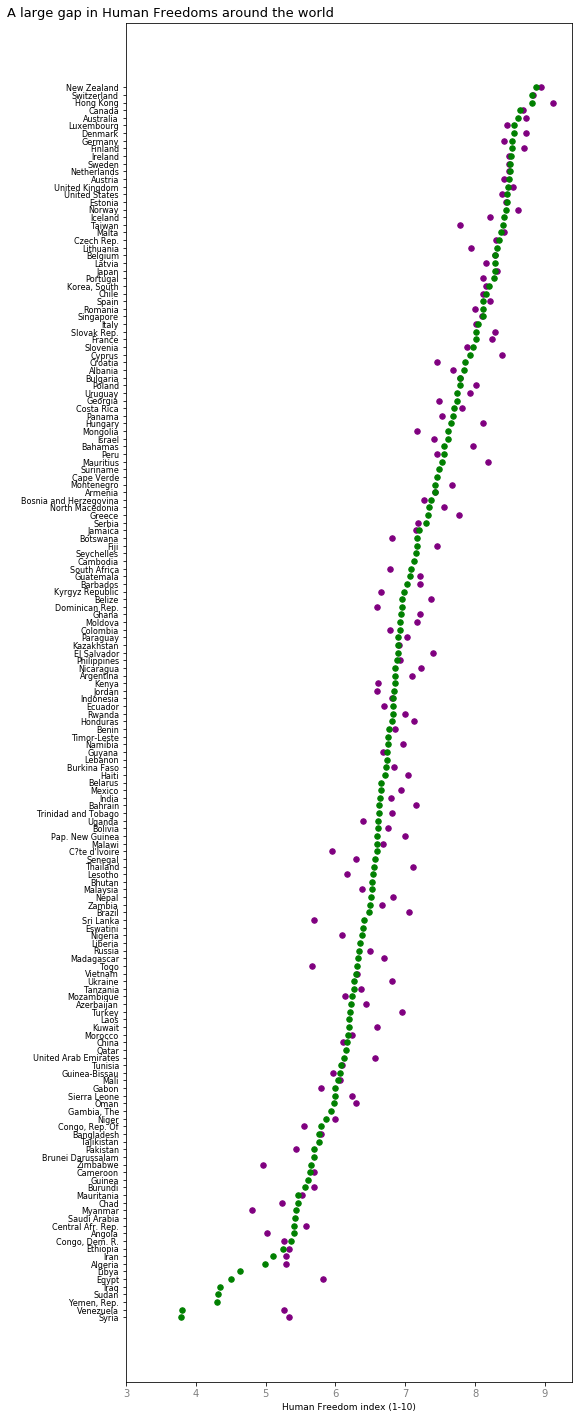

In [0]:
fig, ax = plt.subplots(figsize=(8,25))
#Plot the chart
inputdata=plotset.sort_values(by='hf_2017').reset_index()
inputdata['y_pos']=np.arange(len(inputdata))

inputdata.plot.scatter(x='hf_2008',y='y_pos', color='purple', s=30, ax=ax)
inputdata.plot.scatter(x='hf_2017',y='y_pos', color='green', s=30, ax=ax)

ax.set_title("A large gap in Human Freedoms around the world", fontsize=13, x=0.1, y=1)

# #Remove labels
ax.set_ylabel('')
ax.set_xlabel('Human Freedom index (1-10)', fontsize=9)


#Set Y ticks and tick labels
ax.set_yticklabels(inputdata['countries'], fontsize=8, fontweight='light')
ax.set_yticks(range(0,len(plotset),1))

# #Set X ticks
ax.set_xticklabels([3,4,5,6,7,8,9,10],fontsize=10, fontweight='light', color='gray')
ax.set_xticks(range(3,10,1))


plt.show()


##Scores by year, by region

In [0]:
#fig, ax = plt.subplots(figsize=(15,7))
#basic.groupby(['startYear', 'titleType']).count()['tconst'].unstack().stackplot(ax=ax)
exp=data.groupby(['region', 'year']).mean().unstack().reset_index()
exp=exp.melt(id_vars='region')
exp.rename(columns={exp.columns[1]: "variable"}, inplace=True)
exp


,region,variable,year,value
0,Caucasus & Central Asia,hf_score,2008,6.980000
1,East Asia,hf_score,2008,7.775000
2,Eastern Europe,hf_score,2008,7.731905
3,Latin America & the Caribbean,hf_score,2008,7.130000
4,Middle East & North Africa,hf_score,2008,6.280769
...,...,...,...,...
11495,North America,ef_rank,2017,6.500000
11496,Oceania,ef_rank,2017,54.250000
11497,South Asia,ef_rank,2017,89.352941
11498,Sub-Saharan Africa,ef_rank,2017,114.428571


In [0]:
import plotly.express as px
import numpy as np
graphdata=exp[exp['variable']=='hf_score']
#x = np.arange(10)
fig = px.line(graphdata, x="year", y="value", color='region'
              )
fig.show()

### Changes 2008-2017, countries with the highest drop in HFI

In [0]:
#Changes from 2008 - 2017 for all countries 
countries = pd.crosstab(subset['countries'],subset['year'], values=subset['hf_score'], aggfunc='mean').reset_index()
countries
index = data.groupby(['countries','ISO_code', 'region']).size().reset_index().rename(columns={0:'count'})
countries = set.merge(index, how='left')
countries['y_pos']=countries.index

countries.columns = ['countries',        'hf_2008',        'hf_2009',        'hf_2010',        'hf_2011',
               'hf_2012',        'hf_2013',        'hf_2014',        'hf_2015',        'hf_2016',
               'hf_2017',  'ISO_code',    'region',     'count',     'y_pos']
countries['delta']=countries['hf_2017']-countries['hf_2008']
countries = countries.sort_values(by='delta')
countries['delta_pct']= (countries['hf_2017']/countries['hf_2008'])-1
countries=countries[countries['delta'].notnull()]
countries

,countries,hf_2008,hf_2009,hf_2010,hf_2011,hf_2012,hf_2013,hf_2014,hf_2015,hf_2016,hf_2017,ISO_code,region,count,y_pos,delta,delta_pct
141,Syria,5.34,5.43,5.39,5.49,4.72,3.88,3.94,3.83,3.69,3.79,SYR,Middle East & North Africa,10,141,-1.55,-0.290262
157,Venezuela,5.27,5.18,5.02,5.21,5.09,4.84,4.50,4.08,4.13,3.80,VEN,Latin America & the Caribbean,10,157,-1.47,-0.278937
44,Egypt,5.82,5.71,5.75,5.45,5.45,5.23,4.87,4.49,4.49,4.50,EGY,Middle East & North Africa,10,44,-1.32,-0.226804
150,Turkey,6.96,6.99,7.01,7.23,7.10,7.08,6.69,6.66,6.29,6.21,TUR,Middle East & North Africa,10,150,-0.75,-0.107759
96,Mauritius,8.18,8.10,8.19,8.25,8.29,8.13,7.97,7.82,7.75,7.52,MUS,Sub-Saharan Africa,10,96,-0.66,-0.080685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,Myanmar,4.81,5.21,4.92,4.83,5.25,5.33,5.67,5.49,5.58,5.44,MMR,South Asia,10,103,0.63,0.130977
147,Togo,5.67,5.56,5.56,5.51,5.55,6.20,6.40,6.25,6.36,6.31,TGO,Sub-Saharan Africa,10,147,0.64,0.112875
25,C?te d'Ivoire,5.95,6.03,5.97,6.00,6.11,6.46,6.49,6.40,6.56,6.59,CIV,Sub-Saharan Africa,10,25,0.64,0.107563
161,Zimbabwe,4.96,4.91,4.92,5.13,5.16,5.48,5.56,5.73,5.72,5.65,ZWE,Sub-Saharan Africa,10,161,0.69,0.139113


In [0]:
print(countries[countries['delta']<0].shape)
print(countries[countries['delta']>0].shape)
print(countries[countries['delta']==0].shape)



(79, 17)
(61, 17)
(1, 17)


###Year over year HFI changes for bottom countries

In [0]:
#Get top 12 countries with the highest and 12 countries with the lowest drops: 

targetcountries=np.concatenate((np.array(countries['countries'][:12]), np.array(countries['countries'][-12:])), axis=None)
targetcountries

array(['Syria', 'Venezuela', 'Egypt', 'Turkey', 'Mauritius', 'Brazil',
       'Thailand', 'Ukraine', 'Bahrain', 'El Salvador', 'Cyprus',
       'Hungary', 'Botswana', 'Lesotho', 'Lithuania', 'Angola', 'Croatia',
       'Mongolia', 'Taiwan', 'Myanmar', 'Togo', "C?te d'Ivoire",
       'Zimbabwe', 'Sri Lanka'], dtype=object)

In [0]:
#Let's melt HFI scores data for 2008-2017 to generate a linear graph

fallers = countries[countries['countries'].isin(countries['countries'][:12])]
fallers = fallers.melt(id_vars=['countries', 'region','count','y_pos','delta','delta_pct', 'ISO_code'])
fallers
fallers["variable"] = fallers["variable"].astype('category')
fallers["year_code"] = fallers["variable"].cat.codes
fallers

,countries,region,count,y_pos,delta,delta_pct,ISO_code,variable,value,year_code
0,Syria,Middle East & North Africa,10,141,-1.55,-0.290262,SYR,hf_2008,5.34,0
1,Venezuela,Latin America & the Caribbean,10,157,-1.47,-0.278937,VEN,hf_2008,5.27,0
2,Egypt,Middle East & North Africa,10,44,-1.32,-0.226804,EGY,hf_2008,5.82,0
3,Turkey,Middle East & North Africa,10,150,-0.75,-0.107759,TUR,hf_2008,6.96,0
4,Mauritius,Sub-Saharan Africa,10,96,-0.66,-0.080685,MUS,hf_2008,8.18,0
...,...,...,...,...,...,...,...,...,...,...
115,Ukraine,Eastern Europe,10,152,-0.55,-0.080764,UKR,hf_2017,6.26,9
116,Bahrain,Middle East & North Africa,10,9,-0.52,-0.072727,BHR,hf_2017,6.63,9
117,El Salvador,Latin America & the Caribbean,10,45,-0.51,-0.068919,SLV,hf_2017,6.89,9
118,Cyprus,Eastern Europe,10,39,-0.46,-0.054827,CYP,hf_2017,7.93,9


In [0]:
#generate a graph 

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=6, cols=2, shared_yaxes=True, shared_xaxes=True)


list_of_countries=fallers['countries'].unique()
mydata=fallers[fallers['countries']==list_of_countries[0]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value'],name=list_of_countries[0],),
              
              row=1, col=1)

mydata=fallers[fallers['countries']==list_of_countries[1]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=1, col=2)

mydata=fallers[fallers['countries']==list_of_countries[2]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=2, col=1)

mydata=fallers[fallers['countries']==list_of_countries[3]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=2, col=2)

list_of_countries=fallers['countries'].unique()
mydata=fallers[fallers['countries']==list_of_countries[4]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=3, col=1)

mydata=fallers[fallers['countries']==list_of_countries[5]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=3, col=2)

mydata=fallers[fallers['countries']==list_of_countries[6]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=4, col=1)

mydata=fallers[fallers['countries']==list_of_countries[7]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=4, col=2)

mydata=fallers[fallers['countries']==list_of_countries[8]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=5, col=2)

list_of_countries=fallers['countries'].unique()
mydata=fallers[fallers['countries']==list_of_countries[9]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=5, col=1)

mydata=fallers[fallers['countries']==list_of_countries[10]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=6, col=2)

mydata=fallers[fallers['countries']==list_of_countries[11]]
fig.add_trace(go.Scatter(x=mydata['year_code'], y=mydata['value']),
              row=6, col=1)

fig.update_layout(height=600, width=600,
                  title_text="Biggest Fallers in the Freedom Index of the Past")






fig.show()

###Now let's look at the countries with the biggest drop and biggest increase in the overall Human Freedom index from 2008, and a heatmap of categories

In [0]:
#Now, let's transform our dataa to 
set2 = data[data.countries.isin(targetcountries)]
years = np.array([2008,2017])
set3 = set2[set2['year'].isin(years)]
set3=set3.dropna(axis=1, how='all')
testtest=set3.pivot_table(index=['countries'], columns='year', aggfunc='mean')
testtest

ef_government       ... pf_ss_women_inheritance      
year                   2008 2017  ...                    2008  2017
countries                         ...                              
Angola                  4.3  6.8  ...                     5.0   5.0
Bahrain                 6.4  7.0  ...                     5.0   0.0
Botswana                4.6  6.4  ...                     5.0   7.5
Brazil                  7.2  5.7  ...                    10.0  10.0
C?te d'Ivoire           6.6  5.9  ...                     5.0   7.5
Croatia                 5.6  5.7  ...                    10.0  10.0
Cyprus                  7.7  6.9  ...                     NaN  10.0
Egypt                   6.4  4.9  ...                     5.0   0.0
El Salvador             8.5  8.4  ...                    10.0   7.5
Hungary                 5.8  5.4  ...                    10.0   5.0
Lesotho                 6.1  5.6  ...                     0.0   5.0
Lithuania               6.7  7.4  ...                    10.0  10.0
Mauritius               8.4  8.0  ...                    10.0   5.0
Mongolia                6.8  7.9  ...                    10.0  10.0
Myanmar                 4.8  6.8  ...                    10.0   7.5
Sri Lanka               6.7  7.6  ...                     5.0   0.0
Syria                   5.8  5.7  ...                     5.0   0.0
Taiwan                  7.0  7.4  ...                     5.0   7.5
Thailand                7.3  6.8  ...                    10.0  10.0
Togo                    7.7  6.5  ...                     0.0   7.5
Turkey                  7.1  6.6  ...                    10.0   7.5
Ukraine                 7.0  7.2  ...                    10.0  10.0
Venezuela               4.7  4.6  ...                    10.0  10.0
Zimbabwe                7.1  5.5  ...                     5.0   7.5

[24 rows x 217 columns]

In [0]:
#Let's select columns that we want to display in the heatmap. Honestly, this is a random pick w/o scientific reasoning 

columns=np.array(['ef_government_consumption',
'ef_regulation_credit_private',
'ef_legal_courts',
'ef_money_inflation',
'ef_regulation_labor_conscription',
'pf_movement',
'pf_identity_sex_male',
'pf_religion',
'pf_ss_women',
'pf_ss_disappearances',
'pf_ss_homicide', 'ef_government_soa', 'ef_regulation','ef_regulation_credit','pf_religion_harassment','ef_legal', 'ef_trade', 'pf_movement'])
columns

array(['ef_government_consumption', 'ef_regulation_credit_private',
       'ef_legal_courts', 'ef_money_inflation',
       'ef_regulation_labor_conscription', 'pf_movement',
       'pf_identity_sex_male', 'pf_religion', 'pf_ss_women',
       'pf_ss_disappearances', 'pf_ss_homicide', 'ef_government_soa',
       'ef_regulation', 'ef_regulation_credit', 'pf_religion_harassment',
       'ef_legal', 'ef_trade', 'pf_movement'], dtype='<U32')

In [0]:
result=pd.DataFrame(testtest.index).set_index('countries')
#index is numeric
for i in columns: 
  a=testtest[i,2017]-testtest[i,2008]
  a=pd.DataFrame(a)
  result=pd.concat([result,a], axis=1, sort=False)
result.columns=columns

result

,ef_government_consumption,ef_regulation_credit_private,ef_legal_courts,ef_money_inflation,ef_regulation_labor_conscription,pf_movement,pf_identity_sex_male,pf_religion,pf_ss_women,pf_ss_disappearances,pf_ss_homicide,ef_government_soa,ef_regulation,ef_regulation_credit,pf_religion_harassment,ef_legal,ef_trade,pf_movement
countries,,,,,,,,,,,,,,,,,,
Angola,3.4,-0.8,-1.6,-3.8,0.0,3.4,0.0,1.9,0.0,0.4,-0.2,-0.2,0.4,-0.6,0.2,-0.3,-1.8,3.4
Bahrain,2.2,-7.2,1.3,0.4,0.0,-4.1,0.0,1.6,-2.5,-1.9,0.0,0.0,-0.7,-2.1,-0.9,0.0,-0.4,-4.1
Botswana,2.2,1.5,-0.6,1.8,0.0,-0.8,0.0,0.6,1.3,0.0,-0.2,-1.9,0.6,0.8,-0.1,-0.8,0.3,-0.8
Brazil,0.0,-4.4,-0.8,0.4,0.0,0.0,0.0,-1.9,0.0,0.0,-0.5,1.3,-0.3,-1.8,-0.6,-0.5,0.0,0.0
C?te d'Ivoire,-2.2,-1.9,1.3,1.2,2.0,0.0,0.0,1.4,1.6,1.0,0.4,-0.2,0.4,-1.3,0.9,1.7,-0.4,0.0
Croatia,0.2,0.4,-1.0,1.0,0.0,0.0,0.0,0.1,0.0,0.0,0.3,-0.5,0.1,-0.6,-0.2,-0.1,0.6,0.0
Cyprus,0.7,0.0,-1.7,0.8,1.0,-2.5,0.0,-1.7,0.0,0.0,0.1,-1.8,0.5,0.0,-0.3,-0.6,0.1,-2.5
Egypt,0.8,-7.3,-0.7,-2.2,0.0,-2.5,0.0,-3.8,-2.3,-3.7,-0.5,-2.8,-0.8,-2.7,-3.3,-1.0,-0.6,-2.5
El Salvador,-0.6,-0.4,-1.4,1.1,-7.0,-1.7,0.0,-0.2,-1.2,-1.0,0.0,-0.1,-1.3,-0.8,-0.2,-0.7,-0.3,-1.7


######Graph of the biggest losers and gainers over the decade, and a heatmap of the change of the level of freedoms in different measured categories. 

In [0]:
import plotly.graph_objects as go
cntr = countries[countries['delta'].notnull()]
cntr = cntr.merge(result, left_on='countries', right_index=True)

subset=cntr.head(12)
subset2=cntr.tail(12)
country = subset['countries']
country2 = subset2['countries']

hf_2008 = subset['hf_2008']
hf_2017 = subset['hf_2017']

fig = make_subplots(rows=1, cols=2, shared_yaxes=True)

fig.add_trace(go.Bar(
    x=subset['delta'],
    y=country,
    
    orientation='h',
    text=country,
     # name=regionlist[i],
    hovertemplate=
      "<b>%{text}</b><br><br>" +
      "2017 vs 2008 loss: %{x} points<br>" +
   #   "Freedom Index Score: %{y}<br>" +
      "<extra></extra>",
    marker=dict(
        color='rgba(165,0,38, 0.95)',
        line_color='rgba(165,0,38, 0.95)',
    )
),row=1, col=1)


fig.add_trace(go.Bar(
    x=subset2['delta'],
    y=country2,
    orientation='h',
    text=country,
    hovertemplate=
        "<b>%{text}</b><br><br>"+
        "2017 vs. 2008 gain: +%{x} points</br>",
    marker=dict(
        color='rgba(69,117,180,0.95)',
        line_color='rgba(69,117,180, 0.95)',
    )
),row=1, col=1)



#Plot second subplot
#Create a new name for the x labels


fig.add_trace(go.Heatmap(
                   z=result.iloc[:, :],
                   x=columns,
                   y=result.index,
                   #text=result.index,
                   hovertemplate=
                   "<b>%{y}</b><br><br>"+
                   "category: %{x} <br>"+
                  "2017 vs. 2008 change: %{z} points</br>",
                   colorscale=[[0.0, 'rgb(165,0,38)'], [0.1111111111111111, 'rgb(215,48,39)'], [0.2222222222222222, 'rgb(244,109,67)'],
        [0.3333333333333333, 'rgb(253,174,97)'], [0.4444444444444444, 'rgb(254,224,144)'], [0.5555555555555556, 'rgb(224,243,248)'],
        [0.6666666666666666, 'rgb(171,217,233)'],[0.7777777777777778, 'rgb(116,173,209)'], [0.8888888888888888, 'rgb(69,117,180)'],
        [1.0, 'rgb(49,54,149)']],
        colorbar = dict(
            title = '2017 vs. 2008',
            titleside = 'top',
            tickmode = 'array',
            tickvals = [-9.5,0,9.5],
            ticktext = ['Deteriorated','No change','Improved'],
            ticks = 'outside'
        )
    
                   ), row=1, col=2)




# fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Countries with the biggest changes in the Human Freedom Index 2017 vs 2008, and changes within categories",

     xaxis2=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(3, 102, 102)',
        showticklabels=True,
        tickmode = 'array',
       tickvals = [0,1, 2,3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16],
        ticktext = ['Government consumption', 'Private-sector credit', 'Impartial courts', 
       'Inflation', 'Conscription', 'Movement', 'Gay relationships', 
       'Religious freedom', "Women’s security and safety", 'Disappearances', 
       'Homicide', 'State ownership of assets', 'Regulation overall', 
       'Credit market regulation', 'Harassment and physical hostilities', 
       'Legal system', 'Regulatory trade barriers'],
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=0.5,
        title='point change',
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=1000,
    height=700,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',

    showlegend=False

)

# #fig.update_yaxes(autorange=False)

fig.show()
py.plot(fig, filename = 'chart1', auto_open=True)

'https://plot.ly/~dubrvoskaya/26/'

##Changes in Freedom categories over the years, for all countries. Biggest gainers and biggest losers. 

In [0]:
years = np.array([2008,2017])
allcountries = data[data['year'].isin(years)]
allcountries=allcountries.dropna(axis=1, how='all')
allcountries=allcountries.pivot_table(index=['countries'], columns='year', aggfunc='mean')
allcountries

ef_government       ... pf_ss_women_inheritance      
year                 2008 2017  ...                    2008  2017
countries                       ...                              
Albania               8.2  7.5  ...                    10.0   7.5
Algeria               3.3  3.6  ...                     5.0   0.0
Angola                4.3  6.8  ...                     5.0   5.0
Argentina             6.3  5.7  ...                    10.0  10.0
Armenia               8.9  7.4  ...                    10.0   7.5
...                   ...  ...  ...                     ...   ...
Venezuela             4.7  4.6  ...                    10.0  10.0
Vietnam               6.3  6.7  ...                    10.0   7.5
Yemen, Rep.           4.6  7.1  ...                     NaN   0.0
Zambia                7.6  6.6  ...                     0.0   5.0
Zimbabwe              7.1  5.5  ...                     5.0   7.5

[162 rows x 217 columns]

In [0]:
list_cols = []
cols_array=np.array(allcountries.columns)
for i in range(len(cols_array)):
  list_cols.append(cols_array[i][0])

list_cols=np.unique(list_cols)
list_cols

#Checking that I have both 2018 and 2007 data for each category. 

for i in list_cols: 
  if allcountries[i].shape[1]<2:
    print("Error in: ",i)

#Need to remove 9 fields where I do not have both years: 
to_remove = []
for i in list_cols: 
  if allcountries[i].shape[1]<2:
    to_remove.append(i)
print(to_remove)

index_to_remove=[]
for i in to_remove: 
  index_to_remove.append((np.where(list_cols == i)[0][0]))
print(index_to_remove)

#Finally, let's remove these categories from the categories list: 
list_cols=np.delete(list_cols, index_to_remove)

Error in:  pf_association_political_establish
Error in:  pf_association_political_operate
Error in:  pf_association_prof_establish
Error in:  pf_association_prof_operate
Error in:  pf_association_sport_establish
Error in:  pf_association_sport_operate
Error in:  pf_identity_legal
Error in:  pf_religion_estop_establish
Error in:  pf_religion_estop_operate
['pf_association_political_establish', 'pf_association_political_operate', 'pf_association_prof_establish', 'pf_association_prof_operate', 'pf_association_sport_establish', 'pf_association_sport_operate', 'pf_identity_legal', 'pf_religion_estop_establish', 'pf_religion_estop_operate']
[64, 65, 67, 68, 70, 71, 82, 93, 94]


In [0]:
#Woo-hoo, this worked!!! Now I have a df with all the categories, and changes in their indexes by country. 

result1=pd.DataFrame(allcountries.index).set_index('countries')

all_categories=list_cols
#index is numeric
for category in all_categories: 
  #print('----->>>',category, result1)
  a=(allcountries[category,2017]/allcountries[category,2008])-1
  a=pd.DataFrame(a)
  result1=pd.concat([result1,a], axis=1, sort=False)
result1.columns=all_categories

result1

,ef_government,ef_government_consumption,ef_government_enterprises,ef_government_soa,ef_government_tax,ef_government_tax_income,ef_government_tax_payroll,ef_government_transfers,ef_legal,ef_legal_courts,ef_legal_crime,ef_legal_enforcement,ef_legal_gender,ef_legal_integrity,ef_legal_judicial,ef_legal_military,ef_legal_police,ef_legal_protection,ef_legal_restrictions,ef_money,ef_money_currency,ef_money_growth,ef_money_inflation,ef_money_sd,ef_rank,ef_regulation,ef_regulation_business,ef_regulation_business_adm,ef_regulation_business_bribes,ef_regulation_business_bureaucracy,ef_regulation_business_compliance,ef_regulation_business_licensing,ef_regulation_business_start,ef_regulation_credit,ef_regulation_credit_interest,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_labor,ef_regulation_labor_bargain,ef_regulation_labor_conscription,...,pf_association_prof,pf_association_sport,pf_expression,pf_expression_cable,pf_expression_control,pf_expression_influence,pf_expression_internet,pf_expression_jailed,pf_expression_killed,pf_expression_newspapers,pf_identity,pf_identity_divorce,pf_identity_sex,pf_identity_sex_female,pf_identity_sex_male,pf_movement,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_rank,pf_religion,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_rol,pf_rol_civil,pf_rol_criminal,pf_rol_procedural,pf_score,pf_ss,pf_ss_disappearances,pf_ss_disappearances_disap,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances_organized,pf_ss_disappearances_violent,pf_ss_homicide,pf_ss_women,pf_ss_women_fgm,pf_ss_women_inheritance
countries,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Albania,-0.085366,-0.089888,0.333333,-0.225000,-0.058824,-0.100000,0.000000,-0.239583,-0.037736,-0.295455,-0.046154,-0.153846,0.000000,0.000000,-0.218750,0.00,0.333333,0.243243,-0.185185,0.021277,0.0,0.044944,0.032258,0.031915,-0.347826,0.181818,0.098361,0.575000,-0.046512,0.000000,-0.013699,0.250000,0.000000,0.212500,0.000000,1.000,0.000000,0.189655,-0.111111,2.333333,...,NaN,NaN,0.116883,NaN,-0.116667,0.063830,NaN,0.000000,0.000000,NaN,-0.340909,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,-0.061224,0.000000,NaN,-0.010309,-0.080460,0.081633,-0.117647,0.146341,0.175439,-0.007435,-0.031250,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.034091,-0.120000,0.000000,-0.25
Algeria,0.090909,0.125000,NaN,0.115385,NaN,NaN,NaN,-0.025000,0.146341,0.228571,0.218182,0.000000,0.000000,0.000000,0.433333,-0.16,0.386364,0.371429,-0.029412,-0.039474,0.0,-0.078947,-0.021978,-0.034091,0.223077,-0.018182,0.096154,0.608696,0.000000,-0.590909,0.428571,0.260870,0.033333,-0.190476,0.111111,NaN,-0.470000,0.102041,0.224490,2.000000,...,0.190476,0.315789,0.089552,0.000000,-0.069767,0.000000,0.119403,-0.050000,0.000000,1.272727,-1.000000,-1.00,NaN,NaN,NaN,0.160000,1.0,0.0,-0.50,0.081481,0.113636,2.846154,-0.115385,-0.250000,-0.155556,NaN,NaN,NaN,-0.028037,-0.048780,0.186667,0.0,0.285714,0.222222,0.000000,0.397059,-0.010417,-0.333333,0.000000,-1.00
Angola,0.581395,1.172414,2.000000,-0.060606,NaN,NaN,NaN,-0.011111,-0.090909,-0.484848,NaN,0.000000,-0.200000,-0.160000,NaN,0.00,NaN,NaN,0.964286,0.120000,0.0,1.764706,-0.506667,-0.023256,0.144928,0.075472,-0.109091,NaN,NaN,-0.704545,-0.028571,0.800000,0.426230,-0.082192,-0.142857,0.000,-0.080000,0.800000,NaN,NaN,...,1.000000,4.769231,-0.177215,-0.250000,-0.444444,-0.325000,-0.250000,0.000000,0.000000,-0.253731,0.000000,-0.50,NaN,NaN,NaN,1.030303,inf,inf,0.00,-0.090226,0.275362,1.380952,0.022989,-0.050633,-0.055556,NaN,NaN,NaN,0.099265,0.000000,0.047059,1.0,-0.010000,-0.280000,0.000000,-0.030000,-0.024096,0.000000,0.000000,0.00
Argentina,-0.095238,-0.142857,0.000000,-0.014286,-0.200000,0.000000,-0.666667,-0.086957,-0.069767,0.363636,-0.088889,-0.280000,-0.200000,-0.214286,0.565217,0.00,0.233333,0.375000,0.029851,-0.057971,1.0,-0.324324,-0.289855,-0.277108,0.324324,-0.034483,0.212766,-0.107143,-0.108108,1.840000,0.326531,

In [0]:
#Now I'm going to find biggest gainers, and biggest losets worldwide in 10 years, by just looking at the mean percent change. 
categories_change = pd.DataFrame(result1.mean(axis=0).sort_values()).reset_index()
categories_change.columns=['category', 'change_pct']
categories_change=categories_change[categories_change['change_pct']!=np.Infinity]
categories_change['category'].tail(7)

55                     pf_religion_estop
56                 ef_legal_restrictions
57          ef_regulation_business_start
58                    ef_money_inflation
59                         ef_government
60    ef_regulation_business_bureaucracy
61                        pf_ss_homicide
Name: category, dtype: object

In [0]:
#How many categories got worse, and how many got betteR? 

print('got better: ', categories_change[categories_change['change_pct']>0].size)
print('got worse: ', categories_change[categories_change['change_pct']<0].size)


got better:  78
got worse:  46


In [0]:
fig = make_subplots(rows=2, cols=1, shared_yaxes=False, shared_xaxes=True, vertical_spacing=0.02)



fig.add_trace(go.Bar(
    x=categories_change['change_pct'].head(5),
    y=categories_change['category'].head(5),   
    #text=round(categories_change['change_pct'].head(5)*100,2), 
    #textposition='auto',
    orientation='h',
    hovertemplate=
      "2017 vs 2008 loss: %{x} <br>" +
      "<extra></extra>",
    marker=dict(
        color='rgba(165,0,38, 0.95)',
        line_color='rgba(165,0,38, 0.95)',
    )
),row=1, col=1)

fig.add_trace(go.Bar(
    x=categories_change['change_pct'].tail(5),
    y=categories_change['category'].tail(5),   
    orientation='h',
    hovertemplate=
      "2017 vs 2008 gain: %{x} <br>" +
      "<extra></extra>",
    marker=dict(
        color='rgba(69,117,180,0.95)',
        line_color='rgba(69,117,180,0.95)',
    )
),row=2, col=1)


fig.update_layout(
    title="Biggest movers across freedom aspects 2017 vs 2008",
    yaxis=dict(
        showgrid=True,
        showline=False,
        tickmode='array',
        tickvals=[0,1,2,3,4],
        ticktext=['Bribes/Favoritism', 'Procedural justice', "Women's movement", 'Religious restrictions', 'Criminal justice'],
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
       
    ),
         
     yaxis2=dict(
        showgrid=True,
        showline=False,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(3, 102, 102)',
        tickmode = 'array',
        tickvals = [0,1, 2,3, 4],
        ticktext = ['Starting a business', 'Inflation', 'Government (general)', 'Business bureaucracy', 'Homicide'],
         side='right',
    ),
    xaxis=dict(
      tickformat=',.0%',
      tickmode = 'array',
      #tickvals=[0,-0.1,-0.2,-0.3,-0.4]
      #dtick = 0.1,
    ),
    xaxis2=dict(
      tickformat=',.0%',
      title="% change",
      
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=300,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',

    showlegend=False

)

fig.show()


py.plot(fig, filename = 'chart2', auto_open=True)

'https://plot.ly/~dubrvoskaya/30/'

###Another visualization of a subset of countries, changes 2008-2017

In [0]:
import plotly.graph_objects as go

subset=countries.head(20)
country = subset['countries']
hf_2008 = subset['hf_2008']
hf_2017 = subset['hf_2017']

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=hf_2008,
    y=country,
    name='Freedom index in 2008',
    marker=dict(
        color='rgba(156, 165, 196, 0.95)',
        line_color='rgba(156, 165, 196, 1.0)',
    )
))
fig.add_trace(go.Scatter(
    x=hf_2017, y=country,
    name='Freedom index in 2017',
    marker=dict(
        color='rgba(204, 204, 204, 0.95)',
        line_color='rgba(217, 217, 217, 1.0)'
    )
))




fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Freedom index change from 2008 to 2017 worldwide",
    xaxis=dict(
        showgrid=False,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        dtick=len(countries),
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        yanchor='middle',
        xanchor='right',
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)

#fig.update_yaxes(autorange=False)

fig.show()

# Let's look at 2017 data alone, and map freedom index vs GDP per capita

In [0]:
newset = data[data['year']==2017]

In [0]:
newset

,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,pf_religion_estop,pf_religion_harassment,pf_religion_restrictions,pf_religion,pf_association_association,pf_association_assembly,pf_association_political_establish,pf_association_political_operate,pf_association_political,pf_association_prof_establish,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,2017,ALB,Albania,Eastern Europe,7.84,38.0,1.0,6.7,4.5,4.7,5.3,9.1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,7.5,8.8,9.3,10.0,10.0,10.0,10.0,NaN,NaN,10.0,9.6,8.0,9.2,10.0,10.0,NaN,NaN,10.0,NaN,...,5.1,9.3,9.7,9.6,10.0,9.6,9.6,9.3,8.1,9.0,6.0,9.4,7.7,10.0,6.3,5.4,8.3,6.7,8.3,10.0,9.1,10.0,9.7,5.6,5.4,6.4,8.0,6.3,10.0,6.9,6.3,6.7,9.7,4.1,6.0,7.2,6.7,7.8,7.67,30.0
1,2017,DZA,Algeria,Middle East & North Africa,4.99,155.0,4.0,NaN,NaN,NaN,3.8,9.5,10.0,9.5,5.0,9.9,9.9,8.9,10.0,NaN,NaN,0.0,5.0,7.8,10.0,5.0,2.5,5.8,NaN,NaN,5.0,6.9,3.0,4.9,5.0,5.0,NaN,NaN,5.0,NaN,...,4.7,7.0,8.5,8.9,5.0,7.3,8.5,6.2,5.9,6.9,4.8,0.5,2.6,0.0,3.7,0.0,1.1,1.6,2.8,0.0,5.3,10.0,5.1,5.6,4.1,6.0,6.0,7.8,3.0,5.4,3.7,1.8,9.3,3.8,8.7,7.0,5.7,5.4,4.77,159.0
2,2017,AGO,Angola,Sub-Saharan Africa,5.40,151.0,4.0,NaN,NaN,NaN,3.4,8.1,10.0,9.7,7.5,9.9,7.2,8.9,10.0,NaN,NaN,5.0,7.5,8.1,5.0,5.0,10.0,6.7,NaN,NaN,10.0,8.9,7.5,8.8,2.5,2.5,NaN,NaN,2.5,NaN,...,3.0,9.4,4.2,3.7,5.0,5.6,9.2,7.7,4.3,7.1,4.9,2.5,3.7,0.0,2.9,3.1,0.1,2.0,3.2,5.0,9.2,6.0,6.7,10.0,4.4,7.2,4.0,6.6,0.0,5.4,2.4,1.3,8.7,1.9,8.1,6.8,4.9,5.7,4.83,158.0
3,2017,ARG,Argentina,Latin America & the Caribbean,6.86,77.0,2.0,7.1,5.8,4.3,5.7,8.0,5.0,10.0,7.5,10.0,10.0,8.5,10.0,NaN,NaN,10.0,10.0,8.8,10.0,10.0,10.0,10.0,NaN,NaN,7.5,9.0,6.9,7.8,7.5,10.0,NaN,NaN,5.0,NaN,...,4.0,5.0,6.0,4.9,10.0,6.5,6.7,7.3,5.9,6.6,4.6,5.2,4.9,10.0,5.4,0.8,8.0,4.7,6.5,5.0,4.3,9.0,6.1,2.8,2.2,3.3,10.0,2.5,10.0,5.1,2.5,7.1,9.6,3.3,5.4,6.5,5.7,5.6,5.67,147.0
4,2017,ARM,Armenia,Caucasus & Central Asia,7.42,54.0,2.0,NaN,NaN,NaN,4.9,9.0,10.0,10.0,7.5,10.0,10.0,9.5,10.0,NaN,NaN,7.5,8.8,9.1,10.0,5.0,10.0,8.3,NaN,NaN,5.0,8.6,5.1,6.2,7.5,7.5,NaN,NaN,5.0,NaN,...,5.9,8.6,9.5,9.8,10.0,9.5,9.0,8.8,8.1,8.6,5.7,9.0,7.4,10.0,5.1,5.4,10.0,6.8,8.2,10.0,7.8,10.0,9.3,6.7,5.7,6.8,10.0,9.3,0.0,6.4,4.6,6.2,9.9,4.6,9.3,7.1,6.9,7.5,7.70,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,2017,VEN,Venezuela,Latin America & the Caribbean,3.80,161.0,4.0,1.5,3.3,1.4,2.1,0.0,10.0,10.0,5.0,9.9,9.8,8.9,10.0,NaN,N

###Import and add gdp data tp 2017 Freedom Index data. 

I'm going to explore how much relationship we can see between human freedoms and the size of the economy (measured as GDP), as well as individual wealth (mesaured as GDP per capita)

In [0]:
#import GDP data from Github and rename columns

gdp2017 = pd.read_csv('https://raw.githubusercontent.com/dubrovskaya/DataStorytelling/master/gdp.csv')
gdp2017.head()
gdp2017.columns = ['rank', 'country', 'gdp', 'gdp_abbr', 'gdp_growth',
       'population2017', 'gdp_per_capita', 'share_of_world_gdp']

In [0]:
gdp2017.head()

,rank,country,gdp,gdp_abbr,gdp_growth,population2017,gdp_per_capita,share_of_world_gdp
0,1,United States,19485394000000,$19.485 trillion,0.02,325084756,59939,0.24
1,2,China,12237700479375,$12.238 trillion,0.07,1421021791,8612,0.15
2,3,Japan,4872415104315,$4.872 trillion,0.02,127502725,38214,0.06
3,4,Germany,3693204332230,$3.693 trillion,0.02,82658409,44680,0.05
4,5,India,2650725335364,$2.651 trillion,0.07,1338676785,1980,0.03


In [0]:
#Divide countries by quantile of their GDP per capita and overall 
gdp2017['cut_gdp']=pd.qcut(gdp2017['gdp'],4, labels=["4th qnt", '3rd qnt', '2nd 1nt','1st qnt'])
gdp2017['cut_gdp_per_capita']=pd.qcut(gdp2017['gdp_per_capita'],4, labels=["4th qnt", '3rd qnt', '2nd 1nt','1st qnt'])



In [0]:
#Merge with the 2017 HFI dataset
final = gdp2017.merge(newset, left_on='country', right_on='countries')
final

,rank,country,gdp,gdp_abbr,gdp_growth,population2017,gdp_per_capita,share_of_world_gdp,cut_gdp,cut_gdp_per_capita,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
0,1,United States,19485394000000,$19.485 trillion,0.02,325084756,59939,0.24,1st qnt,1st qnt,2017,USA,United States,North America,8.46,15.0,1.0,7.6,6.7,6.5,6.9,7.9,10.0,9.9,7.5,9.9,9.4,9.3,10.0,NaN,NaN,10.0,10.0,9.1,10.0,10.0,10.0,10.0,NaN,NaN,...,7.4,9.7,9.9,9.6,10.0,9.8,9.5,9.3,6.5,8.4,7.0,9.8,8.4,10.0,7.2,3.8,0.6,3.9,7.7,10.0,8.0,10.0,9.3,9.5,7.6,7.9,10.0,10,10.0,9.2,6.4,8.2,9.8,6.5,9.6,8.0,8.1,8.9,8.19,5.0
1,2,China,12237700479375,$12.238 trillion,0.07,1421021791,8612,0.15,1st qnt,2nd 1nt,2017,CHN,China,East Asia,6.17,126.0,4.0,4.0,5.4,4.8,4.7,9.8,5.0,10.0,5.0,10.0,10.0,8.0,10.0,NaN,NaN,10.0,10.0,9.3,5.0,0.0,10.0,5.0,NaN,NaN,...,5.6,10.0,9.3,9.7,5.0,8.5,9.4,8.0,6.9,8.1,5.8,8.2,7.0,10.0,5.9,0.0,0.6,2.1,6.8,2.0,9.4,10.0,7.1,8.9,5.8,6.0,10.0,2.5,0.0,5.5,5.6,3.8,9.7,5.8,8.4,8.4,7.0,6.5,6.42,113.0
2,3,Japan,4872415104315,$4.872 trillion,0.02,127502725,38214,0.06,1st qnt,1st qnt,2017,JPN,Japan,East Asia,8.28,25.0,1.0,7.7,7.9,7.4,7.6,9.9,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,...,7.6,8.6,9.5,9.9,10.0,9.5,9.6,9.2,4.1,7.7,6.1,8.9,7.5,10.0,7.2,8.5,7.1,7.6,8.2,8.0,8.1,10.0,8.7,8.9,3.9,8.0,8.0,10,10.0,8.1,4.6,9.3,9.6,7.4,8.1,8.5,7.9,8.3,7.86,17.0
3,4,Germany,3693204332230,$3.693 trillion,0.02,82658409,44680,0.05,1st qnt,1st qnt,2017,DEU,Germany,Western Europe,8.53,8.0,1.0,8.6,8.5,7.7,8.3,9.6,10.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,10.0,10.0,9.9,10.0,10.0,10.0,10.0,NaN,NaN,...,7.4,8.3,9.9,9.7,10.0,9.5,9.0,9.0,6.7,8.2,6.8,9.2,8.0,10.0,6.9,3.1,7.7,5.9,8.0,5.0,10.0,10.0,8.3,8.9,6.2,5.8,8.0,6.3,10.0,7.5,6.3,9.3,9.6,7.1,8.9,7.6,8.1,8.0,7.82,20.0
4,5,India,2650725335364,$2.651 trillion,0.07,1338676785,1980,0.03,1st qnt,4th qnt,2017,IND,India,South Asia,6.64,94.0,3.0,4.0,4.2,4.2,4.3,8.7,5.0,9.8,5.0,9.9,9.9,7.9,10.0,NaN,NaN,5.0,7.5,8.0,5.0,5.0,10.0,6.7,NaN,NaN,...,5.2,9.7,9.3,9.5,5.0,8.4,7.9,7.2,3.3,6.1,5.9,6.4,6.1,10.0,5.8,0.0,0.3,2.1,6.1,2.0,7.6,10.0,6.5,7.2,6.0,5.9,5.0,6.3,10.0,6.7,5.7,3.8,9.3,5.6,9.4,6.9,6.8,6.7,6.91,79.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,163,Lesotho,2578265358,$2.58 billion,-0.02,2091534,1233,0.00,4th qnt,4th qnt,2017,LSO,Lesotho,Sub-Sa

In [0]:
#Let's calculate corelation between freedom score and GDP:

np.corrcoef(final['gdp_per_capita'], final['hf_score'])

array([[1.        , 0.64949951],
       [0.64949951, 1.        ]])

##Plot GDP vs Freedom index chart

In [0]:
colors = np.array(['rgba(156, 165, 196, 0.7)','rgba(204, 204, 204, 0.7)','rgba(171,116,115, 0.8)','rgba(208,181,68, 0.8)', 'rgba(191,61,125,0.8)',
                   'rgba(156, 165, 1, 0.7)','rgba(204, 24, 204, 0.7)','rgba(11,116,115, 0.8)','rgba(208,11,68, 0.8)', 'rgba(191,61,12,0.8)'])


###Plot HFI (political and economic), and slice by the country's GDP (high, med, low). 

In [0]:

fig = go.Figure()

gdp_bin=final['cut_gdp'].unique()

for i in range(len(gdp_bin)): 
  final1 = final[final['cut_gdp']==gdp_bin[i]]
  fig.add_trace(go.Scatter(
      x=final1['pf_score'],
      y=final1['ef_score'],
      text=final1['countries'],
      #size=final1['gdp'],
      name=gdp_bin[i],
      hovertemplate=
        "<b>%{text}</b><br><br>" +
        "Political Freedom: $%{x}<br>" +
        "Economic Freedom: %{y}<br>" +
        "<extra></extra>",
      marker=dict(
           color=colors[i],
           line_color=colors[i],
                 )
   ))
fig.update_traces(textposition='top center')

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Political Freedom vs. Economical Freedom, by GDP",
    xaxis_title="Political Freedom",
    yaxis_title="Economic Freedom",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        tickmode = 'linear',
        tickvals = [1,2,3,4,5,6,7,8,9,10],
        ticktext = [1,2,3,4,5,6,7,8,9,10],
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        #yanchor='middle',
        #xanchor='right',
        #orientation="h",
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)


fig.show()

import plotly.io as pio
import chart_studio.plotly as py

py.plot(fig, filename = 'chart3', auto_open=True)

'https://plot.ly/~dubrvoskaya/32/'

###Same graph by GDP per capita

In [0]:
fig = go.Figure()

gdp_bin_per_capita=final['cut_gdp_per_capita'].unique()

for i in range(len(gdp_bin_per_capita)): 
  final1 = final[final['cut_gdp_per_capita']==gdp_bin[i]]
  fig.add_trace(go.Scatter(
      x=final1['pf_score'],
      y=final1['ef_score'],
      text=final1['countries'],
      name=gdp_bin[i],
      hovertemplate=
        "<b>%{text}</b><br><br>" +
        "Political Freedom: $%{x}<br>" +
        "Economic Freedom: %{y}<br>" +
        "<extra></extra>",
      marker=dict(
           color=colors[i],
           line_color=colors[i],
                 )
   ))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Political Freedom vs. Economical Freedom, by GDP per capita (divided into 4 bins)",
    xaxis_title="Political Freedom",
    yaxis_title="Economic Freedom",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        tickmode = 'array',
        tickvals = [1,2,3,4,5,6,7,8,9,10],
        ticktext = [1,2,3,4,5,6,7,8,9,10],
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        #yanchor='middle',
        #xanchor='right',
        #orientation="h",
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)


fig.show()

import plotly.io as pio
import chart_studio.plotly as py

py.plot(fig, filename = 'chart333', auto_open=True)

'https://plot.ly/~dubrvoskaya/85/'

In [0]:
final[final['country']=="Malawi"]

,rank,country,gdp,gdp_abbr,gdp_growth,population2017,gdp_per_capita,share_of_world_gdp,cut_gdp,cut_gdp_per_capita,year,ISO_code,countries,region,hf_score,hf_rank,hf_quartile,pf_rol_procedural,pf_rol_civil,pf_rol_criminal,pf_rol,pf_ss_homicide,pf_ss_disappearances_disap,pf_ss_disappearances_violent,pf_ss_disappearances_organized,pf_ss_disappearances_fatalities,pf_ss_disappearances_injuries,pf_ss_disappearances,pf_ss_women_fgm,pf_ss_women_inheritance_widows,pf_ss_women_inheritance_daughters,pf_ss_women_inheritance,pf_ss_women,pf_ss,pf_movement_domestic,pf_movement_foreign,pf_movement_women,pf_movement,pf_religion_estop_establish,pf_religion_estop_operate,...,ef_legal,ef_money_growth,ef_money_sd,ef_money_inflation,ef_money_currency,ef_money,ef_trade_tariffs_revenue,ef_trade_tariffs_mean,ef_trade_tariffs_sd,ef_trade_tariffs,ef_trade_regulatory_nontariff,ef_trade_regulatory_compliance,ef_trade_regulatory,ef_trade_black,ef_trade_movement_foreign,ef_trade_movement_capital,ef_trade_movement_visit,ef_trade_movement,ef_trade,ef_regulation_credit_ownership,ef_regulation_credit_private,ef_regulation_credit_interest,ef_regulation_credit,ef_regulation_labor_minwage,ef_regulation_labor_firing,ef_regulation_labor_bargain,ef_regulation_labor_hours,ef_regulation_labor_dismissal,ef_regulation_labor_conscription,ef_regulation_labor,ef_regulation_business_adm,ef_regulation_business_bureaucracy,ef_regulation_business_start,ef_regulation_business_bribes,ef_regulation_business_licensing,ef_regulation_business_compliance,ef_regulation_business,ef_regulation,ef_score,ef_rank
127,146,Malawi,6303292264,$6.30 billion,0.04,17670196,357,0.0,4th qnt,4th qnt,2017,MWI,Malawi,Sub-Saharan Africa,6.6,99.0,3.0,4.4,5.4,4.3,4.9,9.3,10.0,10.0,7.5,10.0,10.0,9.5,10.0,NaN,NaN,5.0,7.5,8.8,10.0,10.0,2.5,7.5,NaN,NaN,...,4.7,7.2,8.0,7.7,5.0,7.0,8.5,7.5,5.8,7.3,5.7,5.0,5.4,9.0,6.0,1.5,7.1,4.9,6.6,10.0,0.0,6.0,5.3,4.4,4.4,6.6,10.0,5.7,10.0,6.9,4.4,3.1,8.4,2.8,8.4,8.0,5.9,6.0,6.06,131.0


###Try to visualize with the violin plot

In [0]:
fig = px.violin(final.sort_values(by='cut_gdp_per_capita', ascending=False),  y="hf_score", color="cut_gdp_per_capita", box=True,
          )
fig.update_layout(
    title="Human Freedom index 2017 by GDP per capita (binned)",
    #xaxis_title="Political Freedom",
    yaxis_title="Human Freedom Index 2017",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        tickmode = 'array',
        #tickvals = [0,1,2,3],
        #ticktext = ['lowest GDP', 'low GDP', 'high GDP', 'highest GDP'],
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        orientation="h",
        
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)


fig.show()

py.plot(fig, filename = 'chart5', auto_open=True)

'https://plot.ly/~dubrvoskaya/38/'

## Human Freedom vs GDP, by region

In [0]:

fig = go.Figure()

regionlist=final['region'].unique()

for i in range(len(regionlist)): 
  final1 = final[final['region']==regionlist[i]]
  fig.add_trace(go.Scatter(
      x=np.log(final1['gdp_per_capita']),
      y=final1['hf_score'],
      text=final1['countries'],
      name=regionlist[i],
      hovertemplate=
        "<b>%{text}</b><br><br>" +
        "GDP per capita (log): $%{x}<br>" +
        "Freedom Index Score: %{y}<br>" +
        "<extra></extra>",
      marker=dict(
           color=colors[i],
           line_color=colors[i],
                 )
   ))

fig.update_traces(mode='markers', marker=dict(line_width=1, symbol='circle', size=16))

fig.update_layout(
    title="Human Freedom index 2017 vs. GDP worldwide",
    xaxis_title="GDP per capita (log)",
    yaxis_title="Freedom Index 2017",
    xaxis=dict(
        showgrid=True,
        showline=True,
        linecolor='rgb(102, 102, 102)',
        tickfont_color='rgb(102, 102, 102)',
        showticklabels=True,
        #dtick=len(countries),
        ticks='outside',
        tickcolor='rgb(102, 102, 102)',
    ),
    margin=dict(l=140, r=40, b=50, t=80),
    legend=dict(
        font_size=10,
        #yanchor='middle',
        #xanchor='right',
        orientation="h",
    ),
    width=800,
    height=600,
    paper_bgcolor='white',
    plot_bgcolor='white',
    hovermode='closest',
)


fig.show()

import plotly.io as pio
import chart_studio.plotly as py

py.plot(fig, filename = 'basic-line2', auto_open=True)


'https://plot.ly/~dubrvoskaya/4/'

In [0]:
import chart_studio.tools as tls
tls.get_embed('https://plot.ly/~dubrvoskaya/1/')

'<iframe id="igraph" scrolling="no" style="border:none;" seamless="seamless" src="https://plot.ly/~dubrvoskaya/1.embed" height="525" width="100%"></iframe>'